 Importação de Bibliotecas e Simulação de Dados

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Simulação de dados de setores
np.random.seed(42)
num_setores = 100
dados = {
    "renda_media": np.random.uniform(1000, 8000, num_setores),
    "taxa_desemprego": np.random.uniform(5, 20, num_setores),
    "nivel_educacional": np.random.uniform(0, 1, num_setores),  # 0 a 1 (proporção de nível superior)
    "iluminacao": np.random.choice([0, 1], num_setores, p=[0.3, 0.7]),  # 1: boa iluminação
    "frequencia_crimes": np.random.randint(50, 500, num_setores),  # Número de crimes registrados
    "tipo_crime_mais_comum": np.random.choice(["roubo", "furto", "violência"], num_setores)
}

df = pd.DataFrame(dados)
print(df.head())


   renda_media  taxa_desemprego  nivel_educacional  iluminacao  \
0  3621.780832         5.471438           0.642032           0   
1  7655.000145        14.546156           0.084140           1   
2  6123.957593         9.715340           0.161629           1   
3  5190.609389        12.628560           0.898554           1   
4  2092.130483        18.613497           0.606429           1   

   frequencia_crimes tipo_crime_mais_comum  
0                410             violência  
1                335                 furto  
2                322             violência  
3                418                 roubo  
4                111                 roubo  


#Clustering do setores K-means

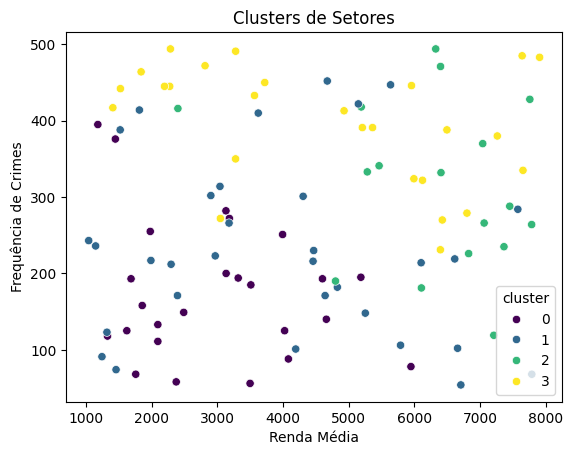

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
scaler = StandardScaler()
variaveis = ["renda_media", "taxa_desemprego", "nivel_educacional", "frequencia_crimes"]
X = scaler.fit_transform(df[variaveis])

# Aplicando K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Visualização dos clusters
sns.scatterplot(x=df["renda_media"], y=df["frequencia_crimes"], hue=df["cluster"], palette="viridis")
plt.title("Clusters de Setores")
plt.xlabel("Renda Média")
plt.ylabel("Frequência de Crimes")
plt.show()


#Prediçao de Taticas de policiamento

In [3]:
# Criando uma variável alvo para táticas (simulação)
df["taticas"] = np.where(df["frequencia_crimes"] > 300, "aumentar_patrulhamento",
                         np.where(df["iluminacao"] == 0, "melhorar_iluminacao", "programas_sociais"))

# Separação em treino e teste
from sklearn.model_selection import train_test_split

X = df[["renda_media", "taxa_desemprego", "nivel_educacional", "frequencia_crimes", "iluminacao"]]
y = df["taticas"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Random Forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Avaliação do modelo
y_pred = modelo.predict(X_test)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Importância das variáveis
importances = modelo.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.2f}")


Relatório de Classificação:
                        precision    recall  f1-score   support

aumentar_patrulhamento       1.00      1.00      1.00        16
   melhorar_iluminacao       1.00      1.00      1.00         5
     programas_sociais       1.00      1.00      1.00         9

              accuracy                           1.00        30
             macro avg       1.00      1.00      1.00        30
          weighted avg       1.00      1.00      1.00        30

renda_media: 0.06
taxa_desemprego: 0.05
nivel_educacional: 0.06
frequencia_crimes: 0.61
iluminacao: 0.21


Gerando recomendaçoes

In [5]:
# Aplicando o modelo a novos dados
df["recomendacao"] = modelo.predict(X)

print("Exemplo de Recomendações por Setor:")
print(df[["renda_media", "frequencia_crimes", "recomendacao"]].head(10))


Exemplo de Recomendações por Setor:
   renda_media  frequencia_crimes            recomendacao
0  3621.780832                410  aumentar_patrulhamento
1  7655.000145                335  aumentar_patrulhamento
2  6123.957593                322  aumentar_patrulhamento
3  5190.609389                418  aumentar_patrulhamento
4  2092.130483                111       programas_sociais
5  2091.961642                133       programas_sociais
6  1406.585285                417  aumentar_patrulhamento
7  7063.233020                266       programas_sociais
8  5207.805082                391  aumentar_patrulhamento
9  5956.508045                446  aumentar_patrulhamento
